# SMS SPAM DETECTION 

This project is to explore the results of applying machine learning techniques to SMS spam detection. Short Message Service junk mail (sometimes known as mobile cellphone junk mail) is any junk message introduced to a mobile smartphone as text messaging through the SMS. The dataset for this challenge originates from the UCI Machine Learning Repository. More detail about dataset can be observed on UCI dataset authentic website. 
* This dataset has been accrued from unfastened or loose for research sources at the Internet.
* The collection is composed of simply one text report, wherein every line has the right magnificence observed by using the uncooked message. 

## Introduction

Mobile cellphone junk mail also referred to as (unsolicited messages, specially advertising), directed at the textual content messaging or different communications offerings of cellular telephones or smartphones. Fighting SMS unsolicited mail is complex via numerous factors (as compared to Internet e mail), including the decrease rate of SMS unsolicited mail, which has allowed many users and provider companies to ignore the issue, and the confined availability of cellular cellphone spam-filtering software program. 

In this project we would attempt to evaluation one of a kind techniques to discover junk mail/ham messages. We will use one-of-a-kind method to establish relation between the textual content and the class, based totally on size of message, word matter, special keywords, the usage of time period-frequency inverse file-frequency (tf-idf) rework.

## Data Exploration

First we need to import statistics shape **records.Txt** that is **tab-separated values (TSV)** document into pandas dataframe for higher evaluate and manipulation. We can use [pd.Read_csv()](http://pandas.Pydata.Org/pandas-medical doctors/strong/generated/pandas.Read_csv.Html) function with separater as tab to load the data in dataframe and can use [dataframe.Head()](http://pandas.Pydata.Org/pandas-doctors/strong/generated/pandas.DataFrame.Head.Html) for higher visualization.

## Importing Libraries

In [10]:
# Importing required libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk, sys

## Loading data

In [11]:
# Loading SMS spam collection data
df = pd.read_csv('data.txt',sep='\t',names=['Class','Text'])
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Exploration

In [12]:
# lets see the shape(i.e number of rows and columns) of data.
df.shape

(5572, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Class    5572 non-null object
Text     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


=> this shows that there are no null values in the data

In [14]:
df.describe()

,Class,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
# Counting the number of words in each Text
df['Count']=0
for i in np.arange(0,len(df.Text)):
    df.loc[i,'Count'] = len(df.loc[i,'Text'])

# Unique values in target set
print ("Unique values in the Class set: ", df.Class.unique())

('Unique values in the Class set: ', array(['ham', 'spam'], dtype=object))


In [16]:
# Replace ham with 0 and spam with 1
df = df.replace(['ham','spam'],[0, 1]) 

# displaying the new table
df.head()

,Class,Text,Count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
# Checking for data balanced or not
import seaborn as sns
plt.title('No of Datapoints per class', fontsize=15)
sns.countplot(df.Class)
plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

## Data Visualization

In [ ]:
# collecting ham messages in one place 
ham  = df[df.Class == 0]
ham_count  = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())
print "Number of ham messages in data set:", ham['Class'].count()
print "Ham Count value", ham_count['Count'].count()

In [ ]:
# collecting spam messages in one place 
spam = df[df.Class == 1]
spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())
print "Number of spam messages in data set:", spam['Class'].count()
print "Spam Count value:", spam_count['Count'].count()

NameError: name 'ham_count' is not defined

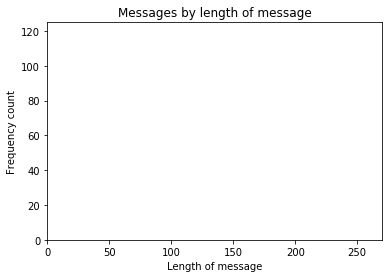

In [12]:
# ploating data for messages
axes  = plt.axes() 
axes.set_xlim(0,270)
axes.set_ylim(0,125)

# naming axes
axes.set_title('Messages by length of message')
plt.xlabel('Length of message')
plt.ylabel('Frequency count')

xlinea = np.linspace(0,273,273,endpoint=True)
xlineb = np.linspace(0,120,120,endpoint=True)
p1 = axes.bar(xlinea, ham_count['Count'], width=1.75, color='g')
p2 = axes.bar(xlineb,spam_count['Count'], width=1.75, color='r')

plt.legend((p1[0], p2[0]), ('Ham', 'Spam'))
plt.show()

## Preparing the Data

In [13]:
# importing Natural Language Toolkit 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#if true it will download all the stopwords
if False:
    nltk.download('stopwords')

#if true will create vectorizer without any stopwords
if False:
    vectorizer = TfidfVectorizer()

#if true will create vectorizer with stopwords
if True:
    stopset = set(stopwords.words("english"))
    vectorizer = TfidfVectorizer(stop_words=stopset,binary=True)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Searched in:
    - 'C:\\Users\\lenovo/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\lenovo\\Anaconda3\\nltk_data'
    - 'C:\\Users\\lenovo\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\lenovo\\AppData\\Roaming\\nltk_data'
**********************************************************************


In [14]:
# Extract feature column 'Text'
X = vectorizer.fit_transform(df.Text)
# Extract target column 'Class'
y = df.Class

NameError: name 'vectorizer' is not defined

In [9]:
#Shuffle and split the dataset into the number of training and testing points
if True: 
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 4457 samples.
Testing set has 1115 samples.


## Training and Evaluating Models

In [10]:
# Import the models from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import f1_score
from sklearn.learning_curve import learning_curve,validation_curve
from sklearn.cross_validation import KFold

objects = ('Multi-NB', 'DTs', 'AdaBoost', 'KNN', 'RF')

In [11]:
# function to train classifier
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return (clf.predict(features))

In [12]:
# Initialize the three models
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = DecisionTreeClassifier(random_state=42)
C = AdaBoostClassifier(n_estimators=100) 
D = KNeighborsClassifier(n_neighbors=1)
E = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [13]:
# loop to call function for each model
clf = [A,B,C,D,E]
pred_val = [0,0,0,0,0]

for a in range(0,5):
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val[a] = f1_score(y_test, y_pred,  average='binary') 
    print pred_val[a]

0.904411764706
0.890459363958
0.940350877193
0.763485477178
0.896296296296


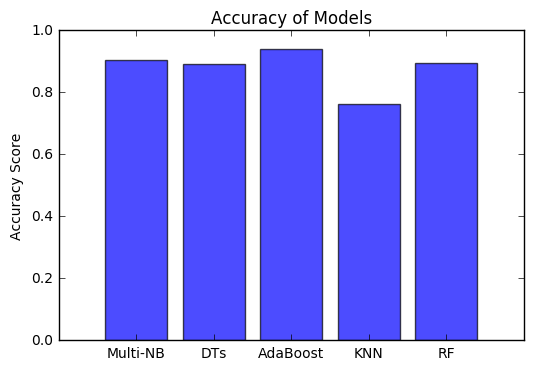

In [14]:
# ploating data for F1 Score
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()

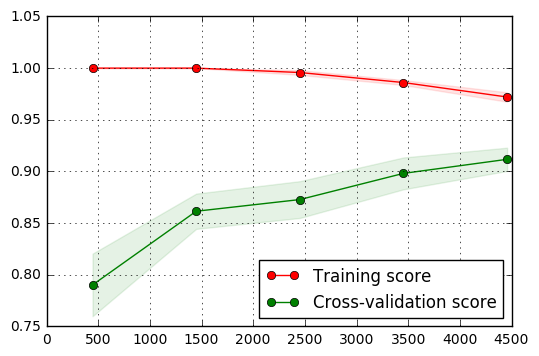

In [15]:
# defining the variable for learning curve
size, score, cv = np.linspace(.1, 1.0, 5), 'f1', KFold(X.shape[0], n_folds= 5, random_state= 42)

# calling the learning_curve function from defined variables
size, train, test = learning_curve(C, X, y, cv= cv, scoring=score, n_jobs=1, train_sizes=size)

# Mean and standard deviation of train and test score
train_mean,test_mean  =  np.mean( train, axis=1), np.mean( test, axis=1)
train_std,  test_std  =  np.std(train, axis=1) , np.std(test, axis=1)

# Ploating the Grid
plt.grid()

# Ploating the curve 
plt.fill_between(size, train_mean - train_std, train_mean + train_std, alpha=0.1,color="r")
plt.fill_between(size,  test_mean - test_std,   test_mean + test_std,  alpha=0.1,color="g")

# Ploating the axis name and legend 
plt.plot(size, train_mean, 'o-', color="r",label="Training score")
plt.plot(size, test_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best");

## Result Analysis

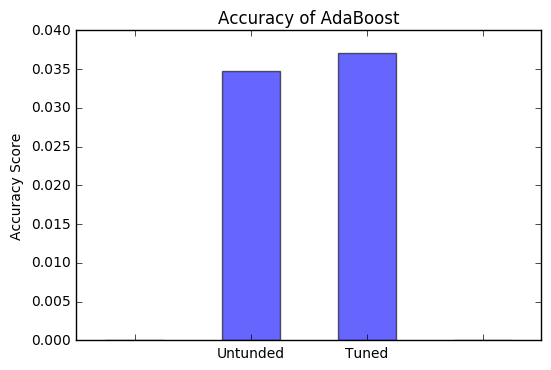

In [16]:
# ploating data for Accuracy Score
# ploating data for Accuracy of Models between 1.00 - 0.90 for better visualization
objects = ('','Untunded', 'Tuned','')
y_pos = np.arange(4)
y_val = [0,0.03470790378,0.037062937063,0 ]
plt.bar(y_pos,y_val, align='center',width = 0.5, alpha=0.6)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of AdaBoost')
plt.show()